# DSCI 100: Individual Project Planning Stage  
**Name:** Ishir Ghatpande  
**Dataset:** Minecraft Research Server (players.csv, sessions.csv)

In this planning report, I describe the video game research server data, pose a predictive question of interest, explore the relevant variables, and outline a modelling plan. 

 # Data Description

**Importing the datasets:** 

In [6]:
library(tidyverse)

players_url <- "players.csv"
sessions_url <- "sessions.csv"

players <- read_csv(players_url, show_col_types = FALSE)
sessions <- read_csv(sessions_url, show_col_types = FALSE)

head(players)
head(sessions)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


- **players.csv**
  - One row per unique player.
  - Includes:
    - A unique player identifier.
    - Demographic / account information (e.g., region, language, registration time).
    - Aggregate or categorical indicators of behaviour and engagement.
    - A binary indicator of whether the player subscribed to the game-related newsletter.
- **sessions.csv**
  - One row per play session.
  - Includes:
    - Player identifier (linking to `players.csv`).
    - Session start/end timestamps.
    - Duration and basic activity metrics.
    - Potentially time-zone or clock-time information.

**General properties & checks**

- Number of players and sessions, and number of variables in each file are inspected with `nrow()` and `ncol()`.
- Variable types (numeric, categorical, datetime) are confirmed via `glimpse()`.
- Potential issues:
  - Missing values in demographics or behaviour measures.
  - Extremely short/long sessions or outliers.
  - Players with zero or only one session.
  - Sampling / participation bias: data only represent players who joined this specific research server.
  - Temporal bias: activity patterns may depend on recruitment campaigns or academic terms.
- I will use tidy tables and consistent keys (`player_id`) to join data in later stages.


**Number of Quantitative Variables:**

In [4]:
players_means <- players |>
  summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE))) |>
  pivot_longer(everything(),
               names_to = "variable",
               values_to = "mean") |>
  mutate(mean = round(mean, 2))

players_means

variable,mean
<chr>,<dbl>
played_hours,5.85
Age,21.14


# Questions

**Broad question (Q1 focus):**  
What player characteristics and behaviours are most predictive of subscribing to the game-related newsletter?

**Specific predictive question:**  
Can we predict whether a player subscribes to the newsletter using their demographics and early in-game behaviour (e.g., region, initial session activity, playtime) in the Minecraft research server dataset?

**How the data help**

- `players.csv` provides the response (newsletter subscription) and baseline characteristics.
- `sessions.csv` provides behavioural information (e.g., number and duration of early sessions) that can be aggregated per player.
- By joining on player ID and constructing early-behaviour summaries, we can build a supervised classification dataset suitable for methods taught in this course.


 # Exploratory Data Analysis and Visualization


**Compute mean for all numeric columns**

In [9]:
# Mean table for quantitative variables in players.csv
players_means <- players |>
  summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE))) |>
  pivot_longer(cols = everything(),
               names_to = "Variable",
               values_to = "Mean_Value") |>
  mutate(Mean_Value = round(Mean_Value, 2))

players_means


Variable,Mean_Value
<chr>,<dbl>
played_hours,5.85
Age,21.14


**Average played hours by experince level**

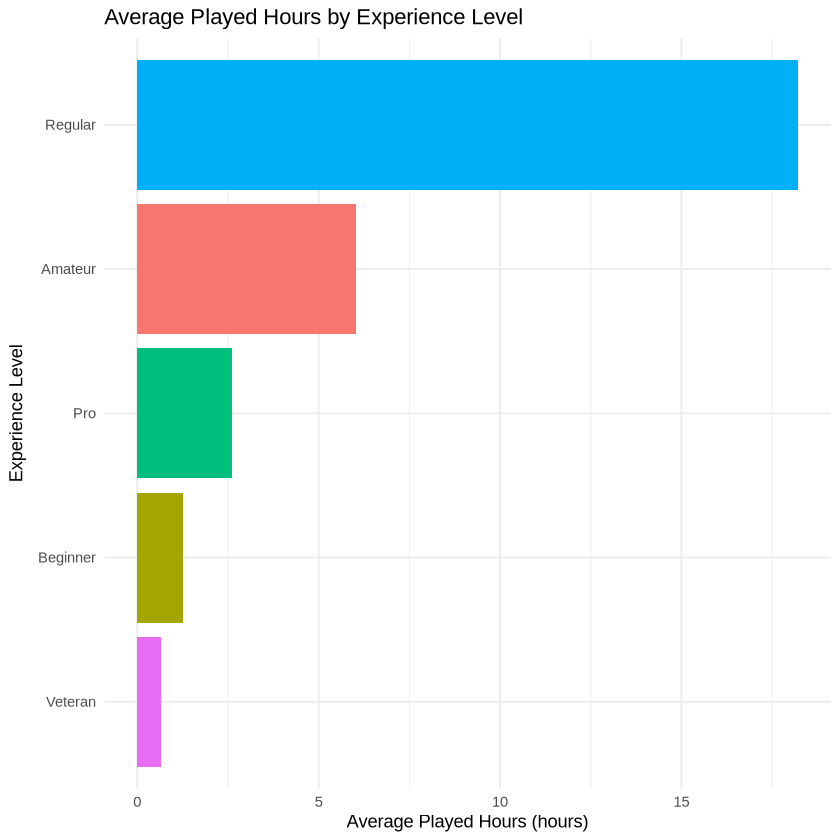

In [10]:
players |>
  group_by(experience) |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE)) |>
  ggplot(aes(x = reorder(experience, mean_played_hours), y = mean_played_hours, fill = experience)) +
  geom_col(show.legend = ) +
  coord_flip() +
  labs(
    title = "Average Played Hours by Experience Level",
    x = "Experience Level",
    y = "Average Played Hours (hours)"
  ) +
  theme_minimal()


**Age distribution of players**

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


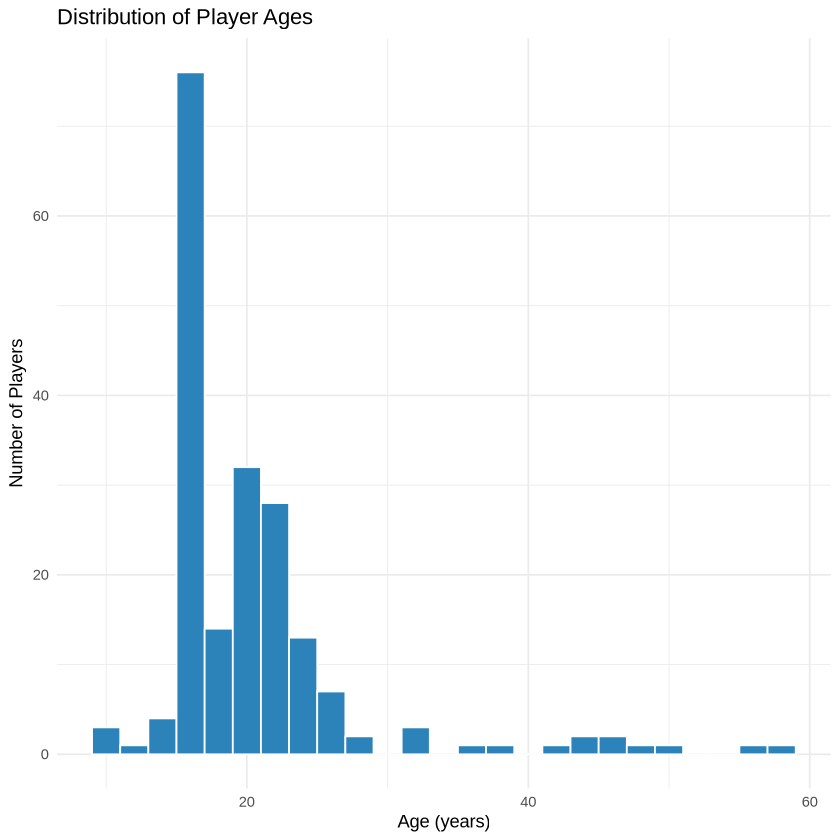

In [11]:
ggplot(players, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = "#2b83ba", color = "white") +
  labs(
    title = "Distribution of Player Ages",
    x = "Age (years)",
    y = "Number of Players"
  ) +
  theme_minimal()


**Insights from early data analysis**

- The dataset loads cleanly with no major formatting issues.  
- The average played hours differ significantly across experience levels: players who identify as "Pro" or "Veteran" tend to have the highest playtime, while "Amateur" and "Regular" players spend less time in the game.
- The age distribution shows that most players are teenagers or young adults (around 15–21 years old), with very few older participants.
- No major missing values are visible, though some players (e.g., "Blake") have 0 played hours, suggesting incomplete or idle participation.
- These patterns suggest that **experience level** and **played hours** could be useful predictors for whether a player subscribes to the newsletter.


# Methods and Plan